<a href="https://colab.research.google.com/github/jossy450/assignment/blob/main/ADS2_Tutorial_2_(2022B)_Tensorflow_Intro_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5

In this tutorial, you see how to interact with Tensors—indexing, slicing, reshaping them. Then, you will use Variables and GradientTape to create and fit a simple model.

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Exercise 1

Create tensors with the following values:

```
5.0
[5.0, 6.0, 7.0]
[[5.0, 6.0, 7.0], [8.0, 9.0, 10.0]]
```

Printing the resulting tensors and their shapes, manipulate these tensors in the following ways:
* Do some arithmetic
* Index and Slice the tensors

In [8]:
### Create tensors with the above values, then do some maths with them
### and try slicing and indexing them
### tf.constant

rank0 = tf.constant(5.0)
rank1 = tf.constant([5.0, 6.0, 7.0])
rank2 = tf.constant([[5.0, 6.0, 7.0], [8.0, 9.0, 10.0]])

print(rank0 * rank1)
print(rank1 * rank2)
print(rank1[1])
print(rank2[:,0])


tf.Tensor([25. 30. 35.], shape=(3,), dtype=float32)
tf.Tensor(
[[25. 36. 49.]
 [40. 54. 70.]], shape=(2, 3), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor([5. 8.], shape=(2,), dtype=float32)


# Exercise 2

Reshaping tensors is very useful, and works a lot like reshaping numpy arrays.

* Reshape the tensor x into shape `(1,3)`, print the resulting tensor
* Print the tensor y and its shape, then flatten the tensor—the flattened order shows how the data is arranged in the memory
* It is good practice to only reshape tensors in ways that combine or split adjacent axes. Reshape tensor y into shapes `(3*2, 5)` and `(3, 2*5)`
* You can reshape a tensor into any shape with the same number of elements, but you shouldn't reorder the axes in the process. Try reshaping tensor y into the shapes `(2, 3, 5)` and `(5, 6)`, and print the results.
* If you want to swap axes, you can use `tf.transpose`. Transpose y with the permutation `[1, 0, 2]` and compare the results with the `(2,3,5)` reshape.

In [19]:
### Reshape tensor x into shape (1,3), print the results
### tf.reshape

x = tf.constant([[1], [2], [3]])
print(x)

print(tf.reshape(x, (1,3)))


tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)


In [31]:
### Print the tensor y and its shape. Flatten the tensor and print the results
### tf.reshape
y = tf.constant([
  [[0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0]],
  [[1, 1, 1, 1, 1],
   [1, 1, 1, 1, 1]],
  [[2, 2, 2, 2, 2],
   [2, 2, 2, 2, 2]],])

### Reshape y into shapes (3*2, 5) and (3, 5*2), print the results
### tf.reshape
print(tf.reshape(y, (3*2, 5)))
print(tf.reshape(y, (3, 5*2)))


### Reshape y into shapes (2, 3, 5) and (5, 6), print the results
### tf.reshape
print(tf.reshape(y, (2, 3, 5)))
print(tf.reshape(y, (5, 6)))


### Transpose y with the permutation [1, 0, 2], compare the result with the
### (2, 3, 5) reshape
### tf.transpose
print(tf.transpose(y, [1, 0, 2]))

tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [2 2 2 2 2]], shape=(6, 5), dtype=int32)
tf.Tensor(
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]], shape=(3, 10), dtype=int32)
tf.Tensor(
[[[0 0 0 0 0]
  [0 0 0 0 0]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [2 2 2 2 2]
  [2 2 2 2 2]]], shape=(2, 3, 5), dtype=int32)
tf.Tensor(
[[0 0 0 0 0 0]
 [0 0 0 0 1 1]
 [1 1 1 1 1 1]
 [1 1 2 2 2 2]
 [2 2 2 2 2 2]], shape=(5, 6), dtype=int32)
tf.Tensor(
[[[0 0 0 0 0]
  [1 1 1 1 1]
  [2 2 2 2 2]]

 [[0 0 0 0 0]
  [1 1 1 1 1]
  [2 2 2 2 2]]], shape=(2, 3, 5), dtype=int32)


# Exercise 3

In this exercise, you will create a simple model and training loop for finding the gradient and intercept of a line through noisy data. Generate the data in the code below. Plot the data along with the ground truth line.

In [53]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

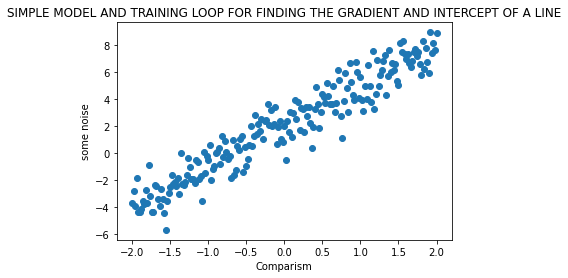

In [55]:
### Plot the data points, x and y, along with the ground truth line
import matplotlib.pyplot as plt
#plt.plot(x * TRUE_W + TRUE_B)

title = str.upper('simple model and training loop for finding the gradient and intercept of a line')
xlabel = ('Comparism')
ylabel = ('some noise')

plt.scatter(x, y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show()

Below is a very simple tensorflow model. You need to add in the variables for the weights and bias (the gradient and intercept of the line), then call the model to initialise it. Print the model variables to check them.

In [59]:
### Complete the model class below. Add in the variables w and b.
### Initialise the model by calling the class, then print the variables
### tf.Variable, model.variables

class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be randomly initialized
        self.w = "tf.Variable(5.0)" # A tf.Variable for the gradient
        self.b = "tf.Variable(0.0)" # A tf.Variable for the intercept

    def __call__(self, x):
        return self.w * x + self.b

        model = MyModel()
        model.variables




To train the model, we must define a loss function. Create a function that takes in the predicted results, the true results and calculates the mean squared error. Test the function by calling the model with the training data, x, and calculating the loss between the true and predicted values of y.

In [64]:
### Define the mean squared error loss in the function. Calculate the
### initial loss of the model between the predicted and ground truth
### values of y
### tf.reduce_mean, tf.square

def loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))



Next, we define the training function. This function takes a model, training data, and a learning rate. Fill in missing code to calculate the model loss within a GradientTape, then calculate the gradients of of the loss function.

In [65]:
### Complete the training function. Within the GradientTape context, calculate
### the loss of the model predictions. Then, use the GradientTape to find the
### gradients the loss function, with respect to W and b
### loss, t.gradient

def train(model, x, y, learning_rate):

    with tf.GradientTape() as tape:
        ### Calculate the loss of the model predictions
        y_pred = model(x)
        mse = loss(y, y_pred)

    ### Use tape.gradient to calculate the gradients with respect to W and b
    dw, db = tape.gradient(mse, [model.w, model.b])

    # Subtract the gradient scaled by the learning rate
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

Lastly, we need the training loop. Create a function that takes in the model, x, y, and an integer called epochs.

Inside the function, create a for loop over the number of epochs. The loop should call the train function—use a learning rate of 0.1—and print the current loss function of the model

In [63]:
### Complete the training loop function

def training_loop(model, x, y, epochs):

    ### Define a loop over the number of epochs that calls the train function
    ### Each epoch, print the current epoch number, the current loss value
    #### and the values of W and b from the model
    
    for i in range(epochs):
      train(model, )
    return ''

Train the model for 10 epochs. create a plot that shows the x and y data points, the ground truth line and the predicted line from the model variables.

In [ ]:
### Train the model for 10 epochs. Plot the data points and display the ground
### truth line and the line predicted by the model
plt.plot(x, y, '.')
plt.plot(x, f(x), label=f"TRUTH: y = {TRUTH_W}x + {TRUTH_B}")
